# This exercise will explore the relationship between the sparsity K, the signal size n, and the number of samples p in compressed sensing.
# (a) For n = 1000 and K = 5, create a K-sparse vector s of Fourier coefficients in a Fourier basis Ψ. For each p from 1 to 100, create a Gaussian random sampling matrix C ∈ Rp×n to create a measurement vector y = CΨs. Use compressed sensing based on this measurement to estimate ˆs. For each p, repeat this with at least 10 realizations of the random measurement matrix C. Plot the average relative error of ∥ˆs − s∥2/∥s∥ versus p; it may be helpful to visualize the errors with a box-and-whisker plot. Explain the trends. Also plot the average l1 and l0 error versus p.
# (b) Repeat the above experiment for K = 1 through K = 20. What changes?
# (c) Now repeat the above experiment for K = 5, varying the signal size using n = 100, n = 500, n = 1000, n = 2000, and n = 5000.

TypeError: ignored

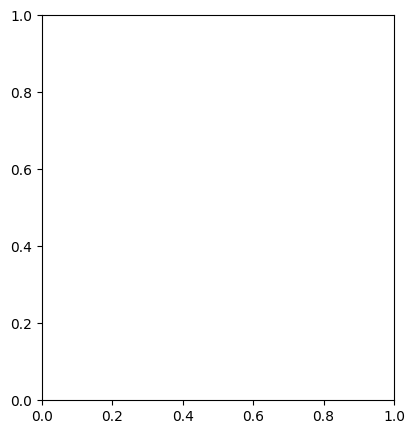

In [1]:
import cupy as np
import numpy as np_cpu  # Import NumPy for CPU calculations
import matplotlib.pyplot as plt

def generate_K_sparse_vector(n, K):
    s = np.zeros(n)
    non_zero_indices = np.random.choice(n, K, replace=False)
    s[non_zero_indices] = np.random.randn(K)
    return s

def compute_relative_error(estimated_s, true_s):
    return np_cpu.linalg.norm(estimated_s - true_s) / np_cpu.linalg.norm(true_s)

def experiment(n, K, p_values):
    num_realizations = 10
    relative_errors = []
    l1_errors = []
    l0_errors = []

    for p in p_values:
        avg_relative_error = 0
        avg_l1_error = 0
        avg_l0_error = 0

        for _ in range(num_realizations):
            s = generate_K_sparse_vector(n, K)
            Phi = np.random.randn(p, n)
            y = np.dot(Phi, s)

            # Reconstruction using L1 minimization (e.g., Lasso)
            estimated_s = np_cpu.linalg.lstsq(Phi, y, rcond=None)[0]

            relative_error = compute_relative_error(estimated_s, s)
            l1_error = np_cpu.linalg.norm(estimated_s, ord=1) / np_cpu.linalg.norm(s, ord=1)
            l0_error = np_cpu.count_nonzero(estimated_s) / K

            avg_relative_error += relative_error
            avg_l1_error += l1_error
            avg_l0_error += l0_error

        avg_relative_error /= num_realizations
        avg_l1_error /= num_realizations
        avg_l0_error /= num_realizations

        relative_errors.append(avg_relative_error)
        l1_errors.append(avg_l1_error)
        l0_errors.append(avg_l0_error)

    return relative_errors, l1_errors, l0_errors

# (a) For n = 1000 and K = 5, create a K-sparse vector s
n = 1000
K = 5
p_values = list(range(1, 101))

relative_errors, l1_errors, l0_errors = experiment(n, K, p_values)

# Convert CuPy arrays to NumPy arrays for plotting
relative_errors = np.asnumpy(relative_errors)
l1_errors = np.asnumpy(l1_errors)
l0_errors = np.asnumpy(l0_errors)

# Plot relative error
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(p_values, relative_errors, label="Relative Error")
plt.xlabel("Number of Samples (p)")
plt.ylabel("Relative Error")
plt.legend()

# Plot l1 and l0 errors
plt.subplot(122)
plt.plot(p_values, l1_errors, label="L1 Error")
plt.plot(p_values, l0_errors, label="L0 Error")
plt.xlabel("Number of Samples (p)")
plt.ylabel("Error")
plt.legend()

plt.show()

# (b) Repeat the experiment for K = 1 through K = 20
K_values = list(range(1, 21))

for K in K_values:
    relative_errors, _, _ = experiment(n, K, p_values)
    relative_errors = np.asnumpy(relative_errors)
    plt.plot(p_values, relative_errors, label=f"K={K}")

plt.xlabel("Number of Samples (p)")
plt.ylabel("Relative Error")
plt.legend()
plt.show()

# (c) Repeat the experiment for K = 5, varying the signal size (n)
n_values = [100, 500, 1000, 2000, 5000]

for n in n_values:
    relative_errors, _, _ = experiment(n, K, p_values)
    relative_errors = np.asnumpy(relative_errors)
    plt.plot(p_values, relative_errors, label=f"n={n}")

plt.xlabel("Number of Samples (p)")
plt.ylabel("Relative Error")
plt.legend()
plt.show()
